## Imports and dataframe loading

In [2]:
import pandas as pd
from os.path import abspath, join, dirname
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/enioh/Documents/Github/MMA-ML-Model/data/processed/PROCESSED_stats_plus_odds.csv')

In [23]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
df.drop(df.loc[df['result'] == 'D'].index, inplace=True) # Drop ties
df.head(5)

,date,fight_url,event_url,fighter_url,result,fighter,opponent,division,stance,dob,method,round,time,time_format,referee,height,reach,knockdowns,sub_attempts,reversals,control,takedowns_landed,takedowns_attempts,sig_strikes_landed,sig_strikes_attempts,total_strikes_landed,total_strikes_attempts,head_strikes_landed,head_strikes_attempts,body_strikes_landed,body_strikes_attempts,leg_strikes_landed,leg_strikes_attempts,distance_strikes_landed,distance_strikes_attempts,clinch_strikes_landed,clinch_strikes_attempts,ground_strikes_landed,ground_strikes_attempts,age,total_time,takedowns_absorbed,takedowns_defended,sig_strikes_absorbed,sig_strikes_defended,total_strikes_absorbed,total_strikes_defended,head_strikes_absorbed,head_strikes_defended,body_strikes_absorbed,body_strikes_defended,leg_strikes_absorbed,leg_strikes_defended,distance_strikes_absorbed,distance_strikes_defended,clinch_strikes_absorbed,clinch_strikes_defended,ground_strikes_absorbed,ground_strikes_defended,takedowns_accuracy,sig_strikes_accuracy,total_strikes_accuracy,head_strikes_accuracy,body_strikes_accuracy,leg_strikes_accuracy,distance_strikes_accuracy,clinch_strikes_accuracy,ground_strikes_accuracy,height_pM,reach_pM,knockdowns_pM,sub_attempts_pM,reversals_pM,control_pM,takedowns_landed_pM,takedowns_attempts_pM,sig_strikes_landed_pM,sig_strikes_attempts_pM,total_strikes_landed_pM,total_strikes_attempts_pM,head_strikes_landed_pM,head_strikes_attempts_pM,body_strikes_landed_pM,body_strikes_attempts_pM,leg_strikes_landed_pM,leg_strikes_attempts_pM,distance_strikes_landed_pM,distance_strikes_attempts_pM,clinch_strikes_landed_pM,clinch_strikes_attempts_pM,ground_strikes_landed_pM,ground_strikes_attempts_pM,age_pM,total_time_pM,takedowns_absorbed_pM,takedowns_defended_pM,sig_strikes_absorbed_pM,sig_strikes_defended_pM,total_strikes_absorbed_pM,total_strikes_defended_pM,head_strikes_absorbed_pM,head_strikes_defended_pM,body_strikes_absorbed_pM,body_strikes_defended_pM,leg_strikes_absorbed_pM,leg_strikes_defended_pM,distance_strikes_absorbed_pM,distance_strikes_defended_pM,clinch_strikes_absorbed_pM,clinch_strikes_defended_pM,ground_strikes_absorbed_pM,ground_strikes_defended_pM,takedowns_accuracy_pM,sig_strikes_accuracy_pM,total_strikes_accuracy_pM,head_strikes_accuracy_pM,body_strikes_accuracy_pM,leg_strikes_accuracy_pM,distance_strikes_accuracy_pM,clinch_strikes_accuracy_pM,ground_strikes_accuracy_pM,elo,height_differential,reach_differential,knockdowns_differential,sub_attempts_differential,reversals_differential,control_differential,takedowns_landed_differential,takedowns_attempts_differential,sig_strikes_landed_differential,sig_strikes_attempts_differential,total_strikes_landed_differential,total_strikes_attempts_differential,head_strikes_landed_differential,head_strikes_attempts_differential,body_strikes_landed_differential,body_strikes_attempts_differential,leg_strikes_landed_differential,leg_strikes_attempts_differential,distance_strikes_landed_differential,distance_strikes_attempts_differential,clinch_strikes_landed_differential,clinch_strikes_attempts_differential,ground_strikes_landed_differential,ground_strikes_attempts_differential,age_differential,total_time_differential,takedowns_absorbed_differential,takedowns_defended_differential,sig_strikes_absorbed_differential,sig_strikes_defended_differential,total_strikes_absorbed_differential,total_strikes_defended_differential,head_strikes_absorbed_differential,head_strikes_defended_differential,body_strikes_absorbed_differential,body_strikes_defended_differential,leg_strikes_absorbed_differential,leg_strikes_defended_differential,distance_strikes_absorbed_differential,distance_strikes_defended_differential,clinch_strikes_absorbed_differential,clinch_strikes_defended_differential,ground_strikes_absorbed_differential,ground_strikes_defended_differential,takedowns_accuracy_differential,sig_strikes_accuracy_differential,total_strikes_accuracy_differential,head_strikes_accuracy_differential,body_strikes_accuracy_di

## Taking a look at Head, Body, Leg, Distance strikes (Standup etc.)

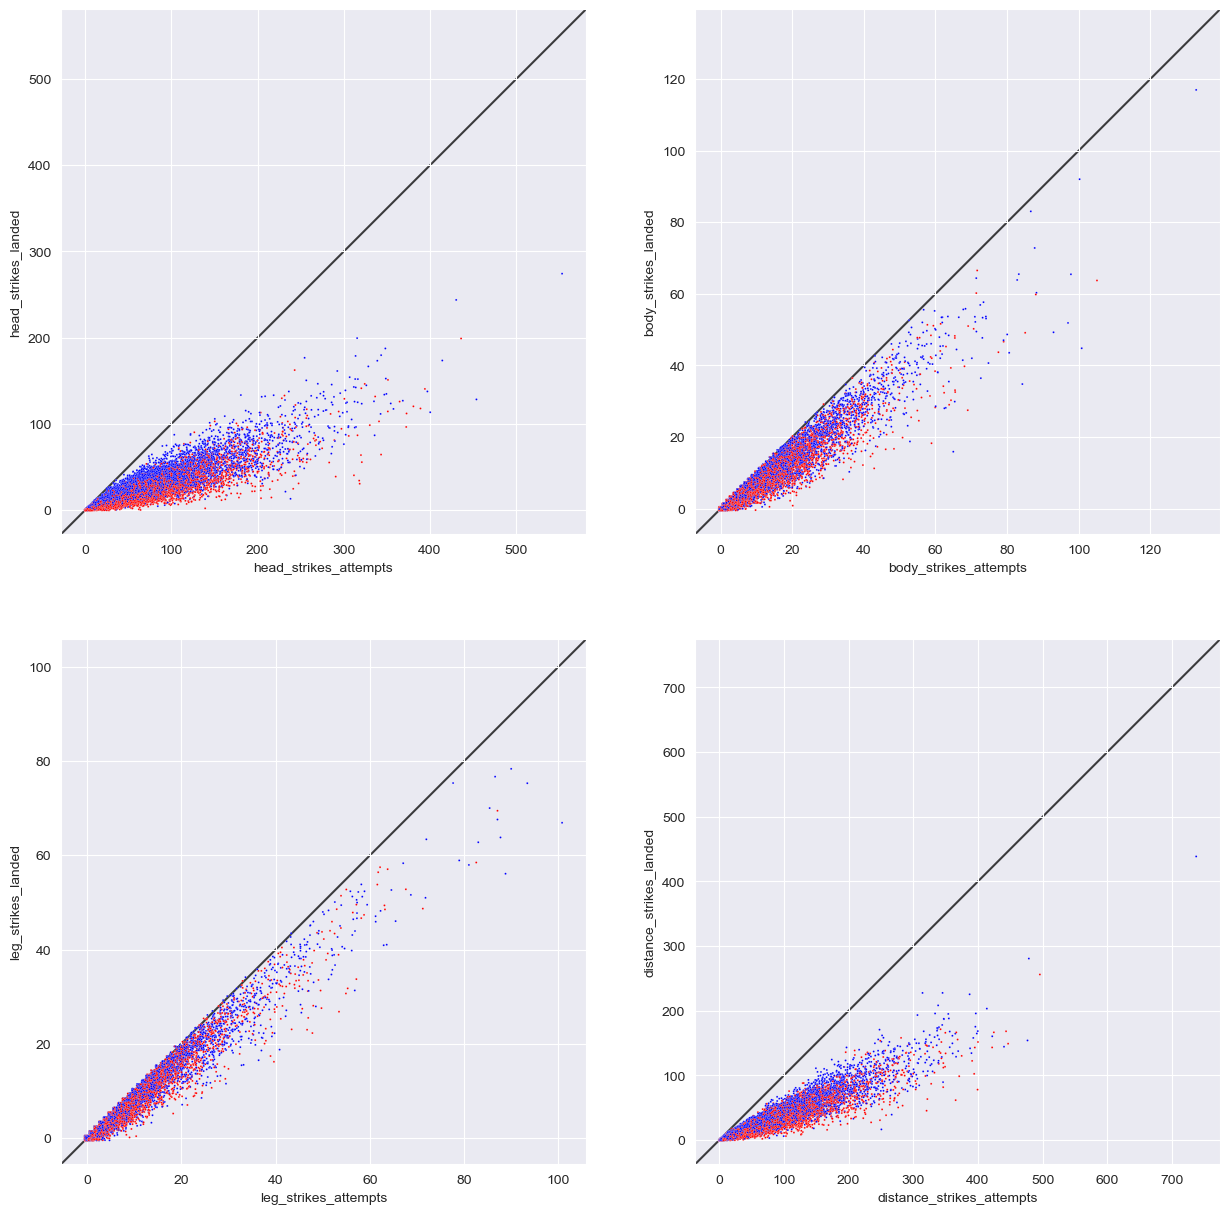

In [24]:
from matplotlib.colors import ListedColormap

colors = {'W': 'blue', 'L': 'red'}
u, inv = np.unique(df['result'].values, return_inverse=True)
u = np.vectorize(colors.get)(u)
cmap = ListedColormap(u)

fig, axs = plt.subplots(2,2, figsize=(15,15))
strike_type = ['head', 'body', 'leg', 'distance']

cols = [(strike + '_strikes_attempts', strike + '_strikes_landed') for strike in strike_type]
for (ax, col) in zip(axs.reshape(-1), cols):
    col_attempt = col[0]
    col_landed = col[1]

    jit_x = np.random.random(df[col_attempt].shape) - 0.5
    jit_y = np.random.random(df[col_landed].shape) - 0.5

    sns.scatterplot(x=df[col_attempt] + jit_x, y=df[col_landed] + jit_y, c=inv, cmap=cmap, s=2, ax=ax)
    ax.set_xlabel(col_attempt)
    ax.set_ylabel(col_landed)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)



Some seperation from winners and losers, not really for the leg kicks.
Accuracy may be an indicator for bout outcome. Will do more investigation later.

### Looking at the ground game, control time, ground strikes .etc

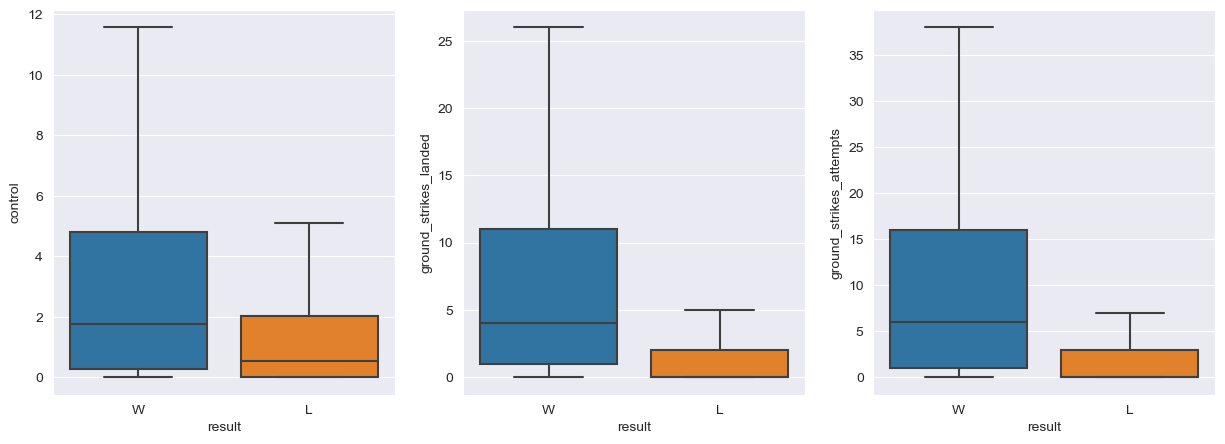

In [27]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
cols = ['control', 'ground_strikes_landed', 'ground_strikes_attempts']
df['all'] = ""
for (ax, col) in zip(axs.reshape(-1), cols):   
    sns.boxplot(data=df, x='result', y=col, ax=ax, showfliers=False)